In [45]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")


In [46]:
df=pd.read_csv(r'C:\Users\sowmy\Desktop\End Project\DataSet\Fertilizer Prediction (1).csv')

In [47]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [48]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [49]:
## descriptive summary of the dataset
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [50]:
df.shape

(99, 9)

In [51]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [52]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [53]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [54]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [55]:
# missing Values
df.isnull().sum() 

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

We can see 
that there are no null values to handel

In [56]:
## removing duplicate
df.drop_duplicates(inplace=True)

In [57]:
df.shape #  there are no duplicates

(99, 9)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

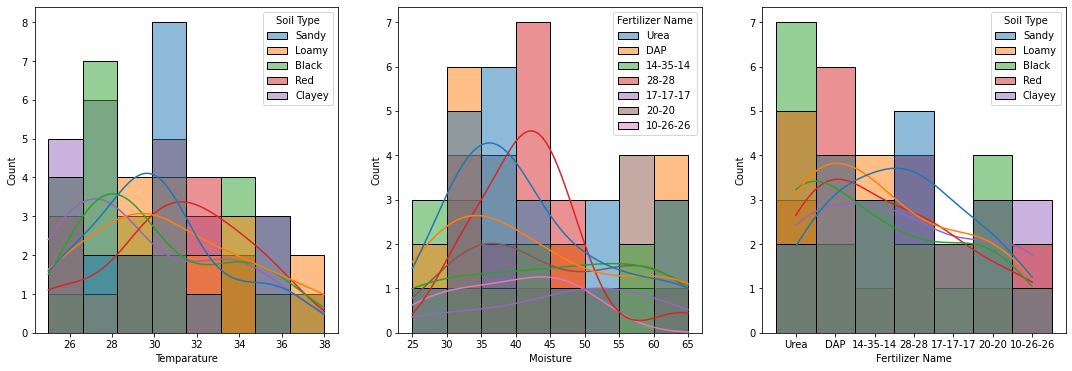

In [59]:
import warnings # when we perform gridsearch, we get lot of warnings. to ignore them we use this method
warnings.filterwarnings('ignore')
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Temparature',kde=True,hue='Soil Type')
plt.subplot(142)
sns.histplot(data=df,x='Moisture',kde=True,hue='Fertilizer Name')
plt.subplot(143)
sns.histplot(data=df,x='Fertilizer Name',kde=True,hue='Soil Type')
plt.show()

## Observation
1. we can observe from the first graph that type of soli is depending on tempeture. Where the temp is high we can notice that their is sandy soil and where the temp is low there we can find the cley
2. We can see from the 2nd graph that fetrizer is not depending on the Moisture
3. The fetrizer is highly depending on soil type

In [60]:
#segrregate numerical and categorical features
numerical_features=[]
for feature in df.columns:
    if df[feature].dtype!='O':
        numerical_features.append(feature)
categorical_feature=[]
for feature in df.columns:
    if df[feature].dtype=='O':
        categorical_feature.append(feature)
    
        

In [61]:
numerical_features

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

In [62]:
categorical_feature

['Soil Type', 'Crop Type', 'Fertilizer Name']

In [63]:
# from sklearn.preprocessing import LabelEncoder
# for i in categorical_feature:    
#     df[i]=LabelEncoder().fit_transform(df[i])
# print(df.head()) 


In [64]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

In [65]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [66]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [67]:

#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


<AxesSubplot:>

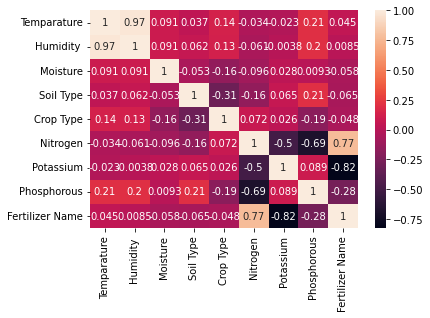

In [68]:
## Explore More Visualization
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

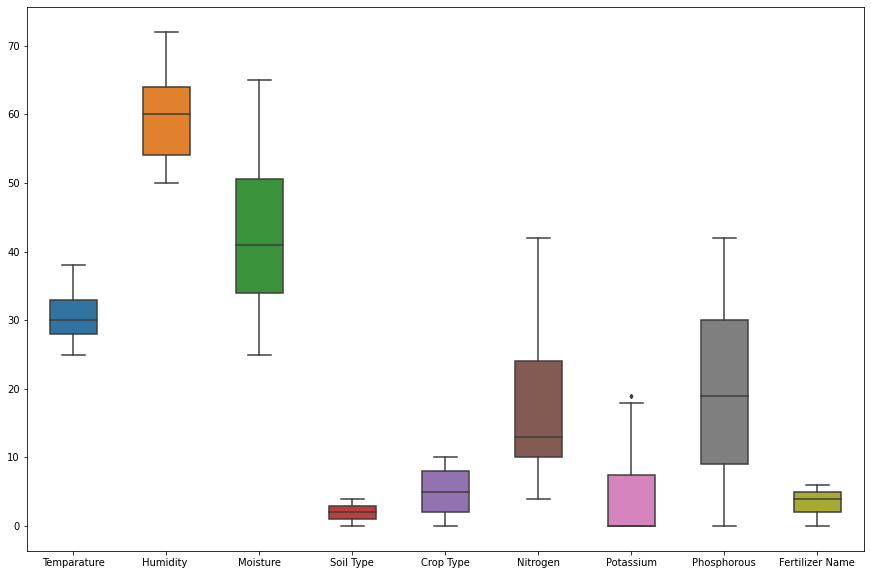

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)# here we are using boxplot to detect the outliers
# here you can observe that there are no outliers

In [70]:
#segregate the dependent and independent variable
x = df.drop(columns = ['Fertilizer Name'])
y = df['Fertilizer Name']

In [71]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape, x_test.shape

((74, 8), (25, 8))

In [72]:
##standard Scaling- Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test) 

In [73]:
from sklearn.linear_model  import LogisticRegression
model = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

## Hyperparameter Tuning
## GridSearch CV 
We are performing grid search as our data is small

In [74]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2','ElasticNet','None'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


In [75]:
model = LogisticRegression()
clf = GridSearchCV(model,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'ElasticNet', 'None'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [76]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [77]:
#Lets train our model using the hyperperMETERS
model=LogisticRegression(C=100.0, penalty='l2', solver='newton-cg')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [78]:
#Lets find the accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 6]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [79]:
import numpy as np

# Extract the second row (index 1) and convert it to a NumPy array
input_data = x.iloc[1].values.reshape(1, -1)  # 1 sample, n features

# Make predictions
result = model.predict(input_data)

print(result)


[5]


In [80]:
def recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num):
    features = np.array([[Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num]])
    prediction = model.predict(features).reshape(1,-1)
    
    return prediction[0] 

In [81]:
Temparature=3
Humidity=60
Moisture=4
Nitrogen=13
Potassium=0
Phosphorous=4
Soil_Num=3
Crop_Num=12
predict=recommendation(Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Num,Crop_Num)
predict[0]

4

In [82]:
# we use the pickling to store the trained model and use reuse to do the predictions on different dataset.
import pickle
pickle.dump(scaler,open('end_scaler.pkl','wb'))
pickle.dump(model,open('trained_model.pkl','wb')) # we are storing it in regressor filr